# Air Pollution In India

Air pollution in India is a serious issue with the major sources being fuelwood and biomass burning, fuel adulteration, vehicle emission and traffic congestion. In autumn and winter months, large scale crop residue burning in agriculture fields – a low cost alternative to mechanical tilling – is a major source of smoke, smog and particulate pollution. India has a low per capita emissions of greenhouse gases but the country as a whole is the third largest after China and the United States.A 2013 study on non-smokers has found that Indians have 30% lower lung function compared to Europeans.

The Air (Prevention and Control of Pollution) Act was passed in 1981 to regulate air pollution and there have been some measurable improvements. However, the 2016 Environmental Performance Index ranked India 141 out of 180 countries.Pollution is turning the Taj Mahal yellow, despite efforts by the Indian government to control air contamination around the poignant 17th century monument and keep it shimmering white, a parliamentary committee has said.

In a report to parliament this week, the standing committee on transport, tourism and culture said airborne particles were being deposited on the monument’s white marble, giving it a yellow tinge.

The monument, in the northern city of Agra about four hours drive south of the capital, was built by Mughal emperor Shah Jahan as a mausoleum for his wife Mumtaz Mahal.

Authorities have made various attempts in the past to keep the area around the Taj Mahal pollution free, including setting up an air pollution monitoring station in Agra.

But the committee said that while air pollutants such as sulphur dioxide and nitrous oxide gases were generally within permissible limits, “suspended particulate matter” had been recorded at high levels except during the rainy season.

It suggested a clay pack treatment that is non-corrosive and non-abrasive be carried out to remove deposits on the marble. “The committee recommends that while undertaking any conservation activity at the Taj Mahal, abundant cautions should be taken to retain the original glory of the shimmering white marble used in this.”

Attracting around 20,000 visitors every day, the monument was completed in 1648 after 17 years of construction by 20,000 workers.

# Import Packages

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.plotly as py
import warnings
warnings.filterwarnings('ignore')


ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [5]:
data=pd.read_csv(r'C:\Users\kajal\Desktop\data.csv')

C:\Users\kajal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [8]:
data.shape

(435742, 13)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [10]:
replacements = {
   'state': {
      r'Uttaranchal': 'Uttarakhand', 
   }
}

data.replace(replacements, regex=True, inplace=True)

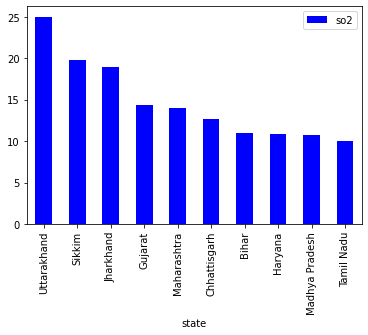

In [11]:
data[['so2','state']].groupby(["state"]).median().sort_values(by='so2',ascending=False).head(10).plot.bar(color='b')
plt.show()

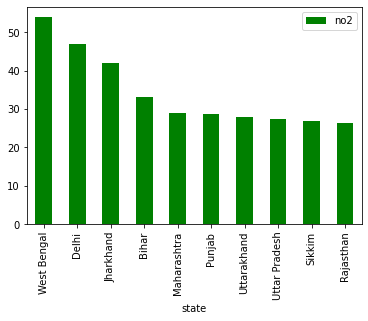

In [13]:
data[['no2','state']].groupby(["state"]).median().sort_values(by='no2',ascending=False).head(10).plot.bar(color='g')
plt.show()

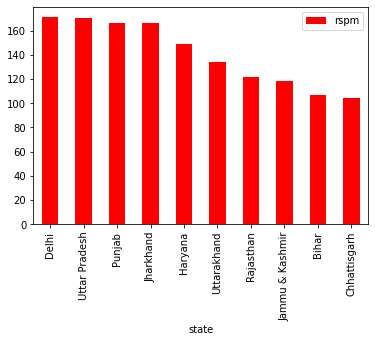

In [15]:
data[['rspm','state']].groupby(["state"]).median().sort_values(by='rspm',ascending=False).head(10).plot.bar(color='r')
plt.show()

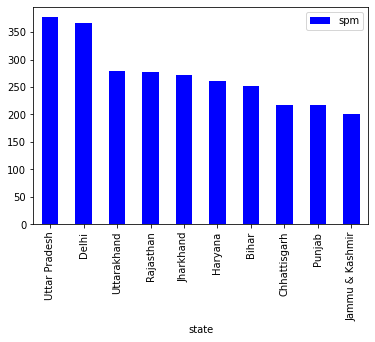

In [17]:
data[['spm','state']].groupby(["state"]).median().sort_values(by='spm',ascending=False).head(10).plot.bar(color='b')
plt.show()

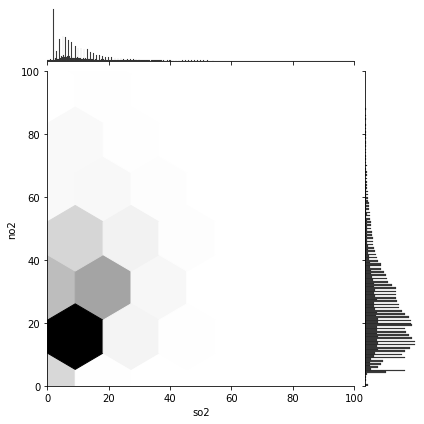

In [18]:
#Exploring relationship between proportion of Sulphur dioxide & Nitrogen dioxide
#sns.lmplot(x='so2',y='no2',data=data)
sns.jointplot(x='so2', y='no2', data=data,kind='hex',color='k',xlim={0,100}, ylim={0,100})

In [19]:
data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d') # date parse
data['year'] = data['date'].dt.year # year
data['year'] = data['year'].fillna(0.0).astype(int)
data = data[(data['year']>0)]

# SO2 Analysis

<AxesSubplot:xlabel='year', ylabel='so2'>

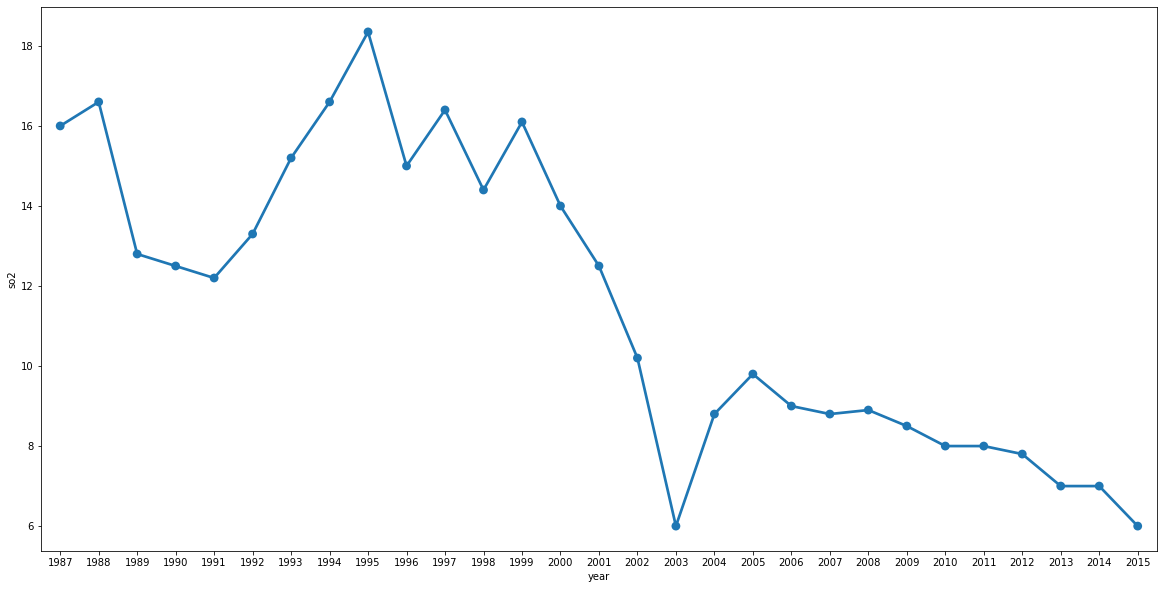

In [25]:
df = data[['so2','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(20,10))
sns.pointplot(x='year', y='so2', data=df)

<AxesSubplot:title={'center':'so2 by state and year'}, xlabel='year', ylabel='state'>

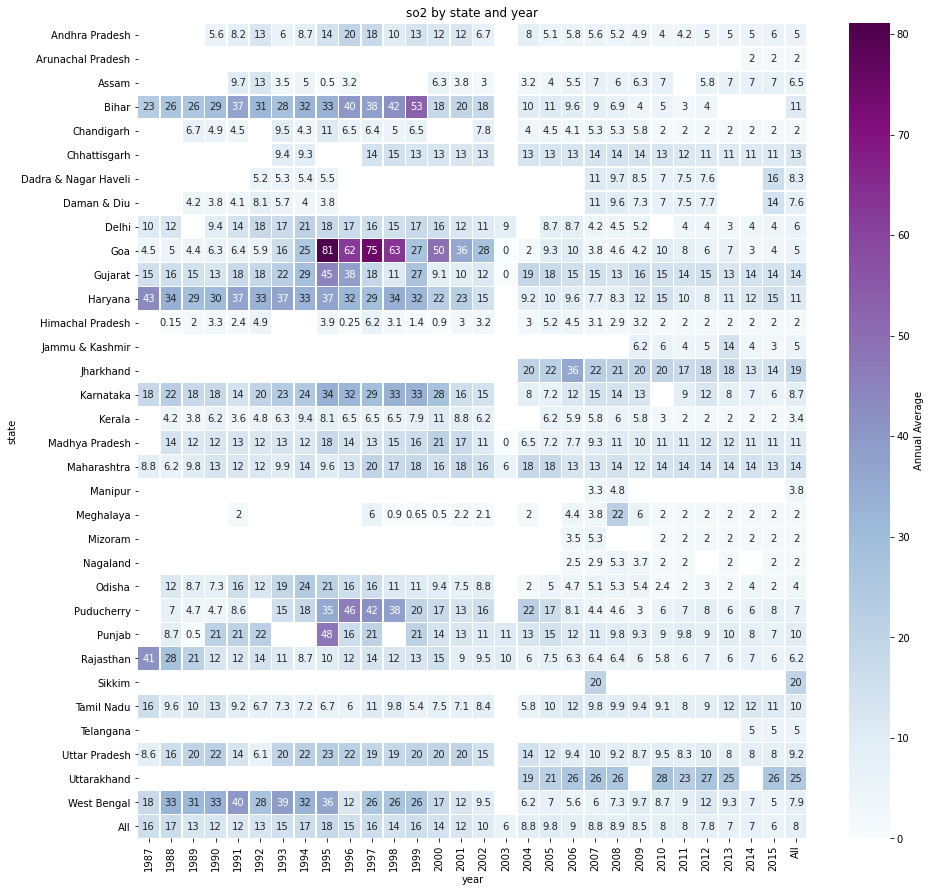

In [21]:
#Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize=(15,15))
ax.set_title('{} by state and year'.format('so2'))
sns.heatmap(data.pivot_table('so2', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot=True,cmap="BuPu", linewidths=.5, ax=ax,cbar_kws={'label': 'Annual Average'})

# **NO2 Analysis

<AxesSubplot:xlabel='year', ylabel='no2'>

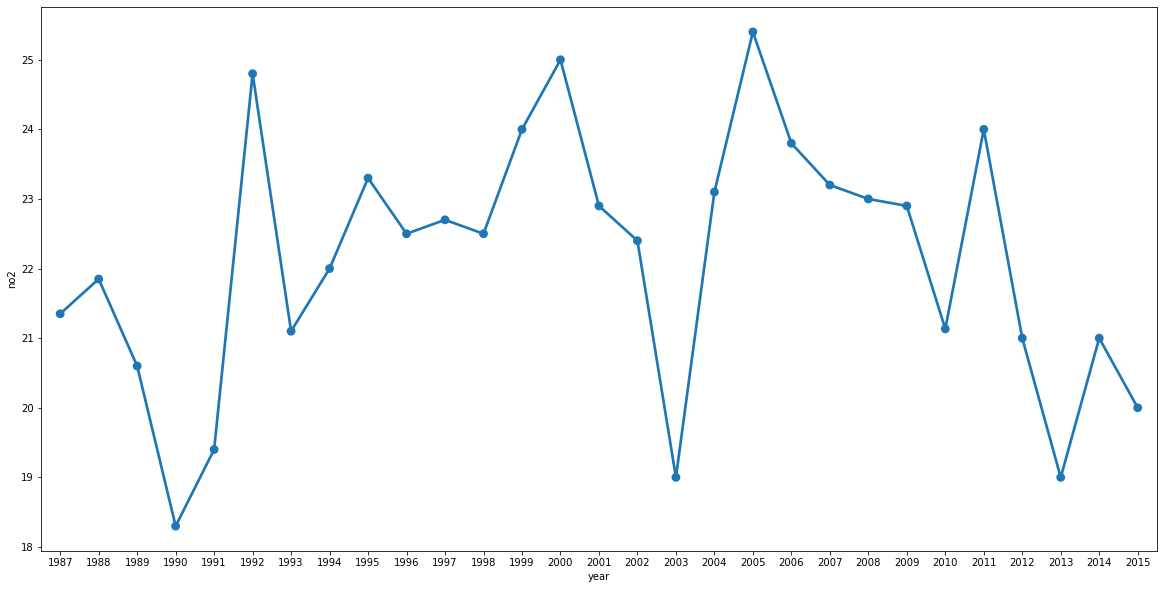

In [24]:
df = data[['no2','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(20,10))
sns.pointplot(x='year', y='no2', data=df)

<AxesSubplot:title={'center':'no2 by state and year'}, xlabel='year', ylabel='state'>

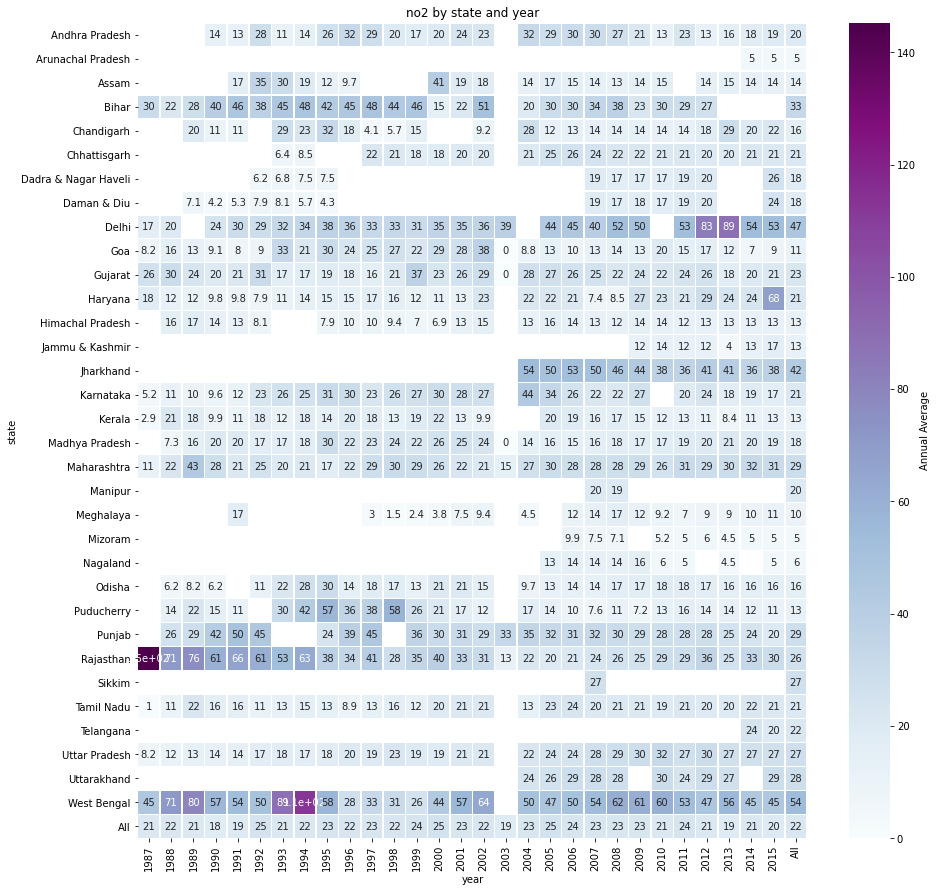

In [23]:
#Heatmap Pivot with State as Row, Year as Col, So2 as Value
f, ax = plt.subplots(figsize=(15,15))
ax.set_title('{} by state and year'.format('no2'))
sns.heatmap(data.pivot_table('no2', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot=True,cmap="BuPu", linewidths=.5, ax=ax,cbar_kws={'label': 'Annual Average'})

# CONCLUSION

Mainly Northern states have high air pollution
South & North East states have less air pollution